In [2]:
n=int(input())
x=0
while(n>0):
    n=int(n/5);
    x=x+1;
print(x)

499
4


In [5]:
res = 0
n=int(input())
while(n > 0):
    n /= 5;
    res += n;
print(res)

499
124.75


In [6]:
n = 500
print(n // 5, n // 25, n // 125)

100 20 4


In [10]:
for n in range(5, 1000, 5):
    res = n // 5 + n // 25 + n // 125
    if res == 100:
        break
print(res, n)

100 405


## Вспомним метод половинного деления
### для решения нелинейного уравнения $f(x)=0$

In [9]:
def solve_dih(a, b, eps, N, f):
    if (abs(b - a) < eps) or (f(a) * f(b) > 0.):
        print("Ошибка ввода, либо неверный отрезок, либо длина меньше точности!")
    else:
        for i in range(N):
            c = (a + b)/2 # координата середины отрезка
            if f(a) * f(c) < 0.:
                b = c
            elif f(b) * f(c) < 0.:
                a = c
            else:
                print("Корень найден с машинным эпсилон! x=", c, "и количество итераций:", i)
                return c
            
            if (abs(b - a) < eps):
                print('Корень найден! x=',c, "и количество итераций:", i)
                return c  
    print('Кол-во итераций достигло предельного значения! x=',c)
    return c

In [10]:
def f(x):
    return x**3-x**2+3*x-3

solve_dih(0, 3., 1.e-13, 100, f)

Корень найден! x= 1.0000000000000284 и количество итераций: 44


1.0000000000000284

<function matplotlib.pyplot.show(close=None, block=None)>

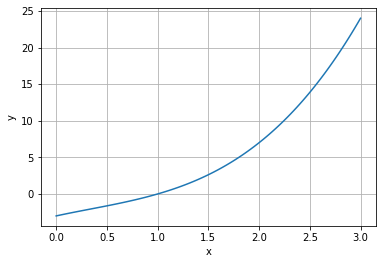

In [12]:
import matplotlib.pyplot as plt
import numpy as np

a = 0.
b = 3.

x = np.linspace(a, b, 101)
y = f(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show

# Метод Ньютона с применением библиотеки символьной математики Sympy
## https://docs.sympy.org/latest/index.html
## $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

In [21]:
import sympy as sm
from sympy import symbols, diff

In [26]:
# зададим символьные переменные x, y, z, t
x, y, z, t = symbols('x y z t')
f = x + 4*y**2 - z * t

In [29]:
# вычисление производной
df = diff(f, t)
df

-z

## Подстановка значений переменных: _expression_.subs(_symbol_, _value_)

In [31]:
f.subs(x, z**2)

-t*z + 4*y**2 + z**2

In [33]:
df.subs(y, 1)

-z

## Преобразование буквенных выражений в функции различных библиотек: lambdify(_symbol_, _expression_, _"library"_)

In [43]:
f = x**3 - x**2 + 3*x - 3
df = diff(f, x)

df_n = sm.lambdify(x, df, "numpy")
f_n = sm.lambdify(x, f, "numpy")
df_n(1)

4

In [40]:
df

3*x**2 - 2*x + 3

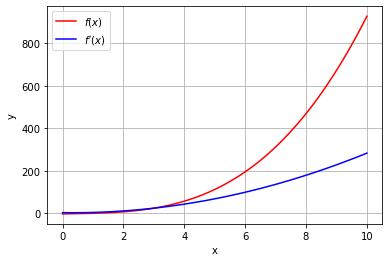

In [55]:
# построение графика функции f(x) и её производной:
a = 0.
b = 10.
xx = np.linspace(a, b, 101)
yy = f_n(xx)
dyy = df_n(xx)

plt.plot(xx, yy, label = '$f(x)$', color = 'r')
plt.plot(xx, dyy, label = "$f'(x)$", color = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
import sympy as sm
from sympy import symbols, diff

def newton(a, b, eps, N, f):
    x[0] = (a + b) / 2
    if (abs(b - a) < eps) or (f(x[0]) * diff(diff(f(x[0]), x), x) > 0.):
        print("Ошибка ввода, либо неверный отрезок, либо длина меньше точности!")
    else:
        for i in range(N):
            x[i] = x[i - 1] - f(x[i - 1])/diff(f(x[i - 1]), x)
        print(x[i])
        
        if diff(f(x[i - 1]) == 0:
            break
    print('Кол-во итераций достигло предельного значения! x =',c)
    return c

SyntaxError: invalid syntax (<ipython-input-62-8f2414f5d9cd>, line 13)

In [59]:
def f(x):
    return x**3-x**2+3*x-3

newton(0, 3., 1.e-13, 100, f)

NameError: name 'newton' is not defined

In [77]:
import sympy as sm
from sympy import symbols, diff

x = symbols("x")
f = x**3 - x**2 + 3*x - 3

def newton(func, funcderiv, x, n):
    
    for itercept in range(1, n):
        i = x - f/df
        x = i
        
    print(f"Решение найдено после {n} итераций.")
    
newton(f, df, -2, 6)

Решение найдено после 6 итераций.


In [80]:
def newtonsmethod(func, funcderiv, x, n):
    
    def f(x):
        f = eval(func)
        return f
    
    def df(x):
        df = eval(funcderiv)
        return df
    
    for itercept in range(1, n):
        i = x - (f(x)/df(x))
        x = i
    print(f"Корни для {x} найдены после {n} итераций.")
    
newtonsmethod("x**3 - x**2 - 2", "3*x**2 - 2*x", -10, 10)

Корни для -17.5306413211071 найдены после 10 итераций.


In [43]:
import sympy as sm
from sympy import symbols, diff

arr = [];

def newtonsmethod2(x, n, eps = 0.01):
    
    def f(x):
        return x**3-x**2+3*x-3

    def df(x):
        deriv = diff(f(x), x)
        return deriv
    
    arr[0] = x;
    for i in range(1, n):
        arr[i] = arr[i - 1] - (f(arr([i - 1])/df(arr([i - 1]))
        #x = i
        #arr.append(x)
        
    print("Корни найдены для после {n} итераций.")
          
newtonsmethod2(-1, 10)

SyntaxError: invalid syntax (<ipython-input-43-65288ec4ff24>, line 21)

Решение найдено после 6 итераций.
1.4655712318767877


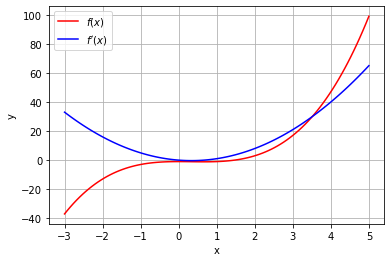

In [75]:
def newton(f, Df, x0, epsilon, max_iter):
    
    xn = x0
    
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print(f'Решение найдено после {n} итераций.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Производная равна нулю. Решений нет.')
            return None
        xn = xn - fxn/Dfxn
        
    print('Превышено максимально число итераций. Решений нет.')
    return None

p = lambda x: x**3 - x**2 - 1
Dp = lambda x: 3*x**2 - 2*x
approx = newton(p, Dp, 1, 1e-10, 10)
print(approx)

df_n = sm.lambdify(x, df, "numpy")
f_n = sm.lambdify(x, f, "numpy")
xx = np.linspace(-3, 5, 101)
yy = p(xx)
dyy = Dp(xx)
plt.plot(xx, yy, label = '$f(x)$', color = 'r')
plt.plot(xx, dyy, label = "$f'(x)$", color = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

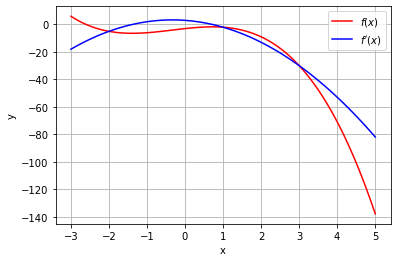

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm
from sympy import symbols, diff

x = symbols("x")
f = -x**3 - x**2 + 3*x - 3 # уравнение f(x) = 0
eps = 1e-10               # точность
df = diff(f, x)

df_n = sm.lambdify(x, df, "numpy")
f_n = sm.lambdify(x, f, "numpy")

xn = 0.
N = 1000

for i in range (N):
    xN = xn - f_n(xn) / df_n(xn)
    if abs(xN - xn) > eps:
        xn = xN
    else:
        break
        
xx = np.linspace(-3, 5, 101)
yy = f_n(xx)
dyy = df_n(xx)

plt.plot(xx, yy, label = '$f(x)$', color = 'r')
plt.plot(xx, dyy, label = "$f'(x)$", color = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()